# Capstone Project (SEPHORA)

# Enhancing Customer Experience: Unraveling Sephora’s Skincare Reviews 

##  Product Dataset Overview 



| Feature           | Description                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| product_id        | The unique identifier for the product from the site                                            |
| product_name      | The full name of the product                                                                    |
| brand_id          | The unique identifier for the product brand from the site                                      |
| brand_name        | The full name of the product brand                                                              |
| loves_count       | The number of people who have marked this product as a favorite                                |
| rating            | The average rating of the product based on user reviews                                        |
| reviews           | The number of user reviews for the product                                                     |
| size              | The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type |
| variation_type    | The type of variation parameter for the product (e.g. Size, Color)                             |
| variation_value   | The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)       |
| variation_desc    | A description of the variation parameter for the product (e.g. tone for fairest skin)          |
| ingredients       | A list of ingredients included in the product, for example: ['Product variation 1:', 'Water, Glycerin', 'Product variation 2:', 'Talc, Mica'] or if no variations ['Water, Glycerin'] |
| price_usd         | The price of the product in US dollars                                                         |
| value_price_usd   | The potential cost savings of the product, presented on the site next to the regular price     |
| sale_price_usd    | The sale price of the product in US dollars                                                    |
| limited_edition   | Indicates whether the product is a limited edition or not (1-true, 0-false)                    |
| new               | Indicates whether the product is new or not (1-true, 0-false)                                 |
| online_only       | Indicates whether the product is only sold online or not (1-true, 0-false)                     |
| out_of_stock      | Indicates whether the product is currently out of stock or not (1 if true, 0 if false)         |
| sephora_exclusive | Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)           |
| highlights        | A list of tags or features that highlight the product's attributes (e.g. ['Vegan', 'Matte Finish']) |
| primary_category  | First category in the breadcrumb section                                                       |
| secondary_category| Second category in the breadcrumb section                                                      |
| tertiary_category | Third category in the breadcrumb section                                                       |
| child_count       | The number of variations of the product available                                             |
| child_max_price   | The highest price among the variations of the product                                         |
| child_min_price   | The lowest price among the variations of the product                                          |


This table organizes the various features and their descriptions in a clear tabular format. Each row represents a specific feature, and the corresponding descriptions are provided in the adjacent cell.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np

# loading in products data

data = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\product_info.csv")
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

From this, we gather that the products dataset contains 27 columns and 8,494 rows of data. The columns vary in data types, and there is missing data within the dataframe.

## Review Dataset Overview



| Feature               | Description                                                                                       |
|-----------------------|---------------------------------------------------------------------------------------------------|
| author_id             | The unique identifier for the author of the review on the website                                 |
| rating                | The rating given by the author for the product on a scale of 1 to 5                                |
| is_recommended        | Indicates if the author recommends the product or not (1-true, 0-false)                           |
| helpfulness           | The ratio of all ratings to positive ratings for the review: helpfulness = total_pos_feedback_count / total_feedback_count |
| total_feedback_count  | Total number of feedback (positive and negative ratings) left by users for the review            |
| total_neg_feedback_count | The number of users who gave a negative rating for the review                                    |
| total_pos_feedback_count | The number of users who gave a positive rating for the review                                    |
| submission_time       | Date the review was posted on the website in the 'yyyy-mm-dd' format                              |
| review_text           | The main text of the review written by the author                                                |
| review_title          | The title of the review written by the author                                                    |
| skin_tone             | Author's skin tone (e.g. fair, tan, etc.)                                                         |
| eye_color             | Author's eye color (e.g. brown, green, etc.)                                                      |
| skin_type             | Author's skin type (e.g. combination, oily, etc.)                                                |
| hair_color            | Author's hair color (e.g. brown, auburn, etc.)                                                    |
| product_id            | The unique identifier for the product on the website                                             |

This table presents the various features related to the review data in a tabular format. Each row corresponds to a specific feature, and the descriptions are provided in the adjacent cell, making it easy to read and understand the details of each feature.

For the datasets related to the reviews, it will be helpful to join them all into one dataframe, which we can do with the following:

In [2]:
# getting the files

import pandas as pd

t1 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_0_250.csv", low_memory=False)
t2 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_250_500.csv", low_memory=False)
t3 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_500_750.csv", low_memory=False)
t4 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_750_1000.csv", low_memory=False)
t5 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_1000_1500.csv", low_memory=False)
t6 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_1500_end.csv", low_memory=False)

# combining the dfs

texta = pd.concat([t1,t2,t3,t4,t5,t6])
texta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  int64  
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  int64  
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  int64  
 6   total_neg_feedback_count  1301136 non-null  int64  
 7   total_pos_feedback_count  1301136 non-null  int64  
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 117

We gather that there are around 1.3 million reviews with varying amounts of missing data across 19 columns of the 6 datasets.

It can also be helpful to view the numeric and non-numeric columns of both dataframes. We can do so with the following:

Numeric Columns

In [5]:
numeric_cols = data.select_dtypes(include = ['number']).columns
print(numeric_cols)
print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')

Index(['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')
15 Numeric Columns in Products Dataset


In [6]:
numeric_cols_reviews = texta.select_dtypes(include = ['number']).columns
print(numeric_cols_reviews)
print(f'{len(numeric_cols_reviews)} Numeric Columns in Reviews Dataset')

Index(['Unnamed: 0', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'price_usd'],
      dtype='object')
8 Numeric Columns in Reviews Dataset


Non-Numeric Columns

In [7]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)
print(f'{len(non_numeric_cols)} Non-Numeric Columns in Products Dataset')

Index(['product_id', 'product_name', 'brand_name', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category'],
      dtype='object')
12 Non-Numeric Columns in Products Dataset


In [8]:
non_numeric_rev_cols = texta.select_dtypes(exclude=['number']).columns
print(non_numeric_rev_cols)
print(f'{len(non_numeric_rev_cols)} Non-Numeric Columns in Reviews Dataset')

Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name'],
      dtype='object')
11 Non-Numeric Columns in Reviews Dataset


# Data Cleaning 

## Data Cleaning on product Dataset

Next, we need to clean the products dataset by performing the following tasks:

Assessing missing data and determining its extent. Removing unnecessary data that is not relevant to our analysis. Identifying and handling outliers, if present. Reformatting the data if required.

Here we use the following code to see the amount of nulls by column within the dataset:

In [9]:
num_missing = data.isna().sum()
num_missing

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

<AxesSubplot:>

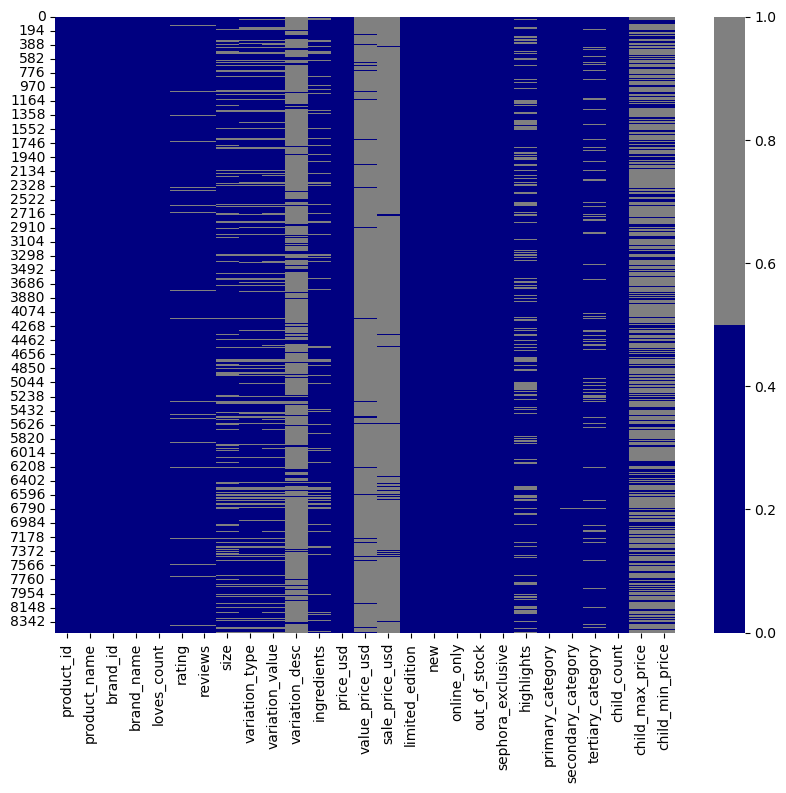

In [10]:
# heatmap to visualize missing data (products)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols= data.columns
colors=['navy','grey']
sns.heatmap(data[cols].isna(),cmap=sns.color_palette(colors))

From this, we can make note of the columns with a high percentage of missing data for when we assess which columns to remove from our dataset

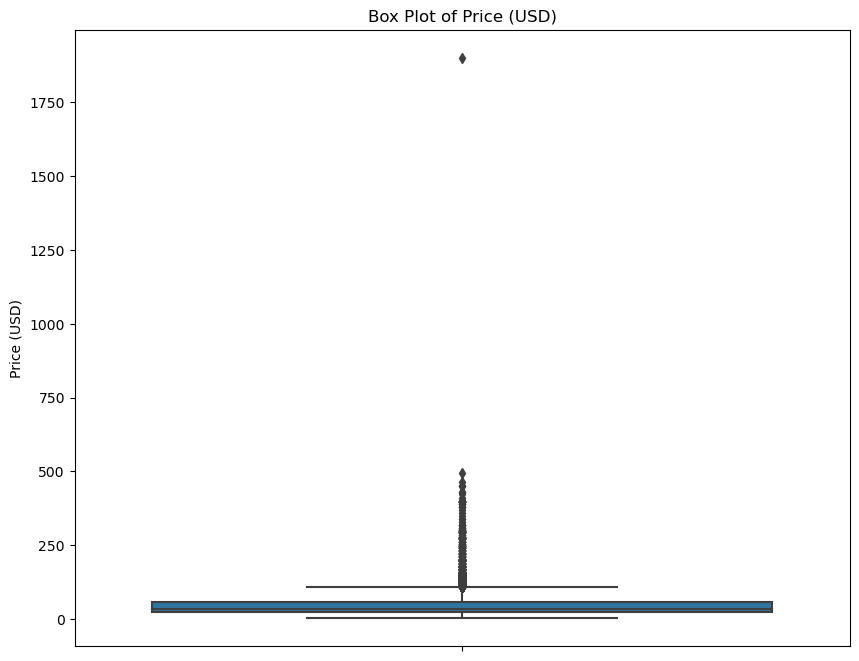

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the data
# Replace 'data' with the actual DataFrame name

plt.figure(figsize=(10, 8))
sns.boxplot(data=data, y='price_usd')
plt.title('Box Plot of Price (USD)')
plt.ylabel('Price (USD)')
plt.show()

Explanation:
By creating a box plot of the 'price_usd' column, we can quickly observe the spread and central tendency of the prices in the dataset. It allows us to identify potential outliers, understand the range of prices, and assess the overall distribution of the prices in terms of quartiles.

In summary, the box plot provides an effective and concise visual summary of the distribution of the 'price_usd' column in the 'data' DataFrame, helping us better understand the pricing patterns and any potential outliers in the dataset.



In [12]:
data.loc[data['price_usd']>1750]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
6802,P502216,Shani Darden by Déesse PRO LED Light Mask,6314,Shani Darden Skin Care,4154,3.75,4.0,NaN,NaN,NaN,...,1,0,1,"['Good for: Loss of firmness', 'Good for: Anti...",Skincare,High Tech Tools,Anti-Aging,0,NaN,NaN


The code data.loc[data['price_usd']>1750] retrieves rows from the data DataFrame where the value in the 'price_usd' column is greater than to 1750.

After doing some digging on Sephora's site, we can confirm that the price of the product above is legitimate. However, we will still exclude the outlier from the data to better gauge the price distribution later on.

Dropping the outlier 

In [13]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data"
# Replace "data" with the actual name of your DataFrame if different.

# Code to filter and drop the rows
data.drop(data[data['price_usd'] > 1750].index, inplace=True)

# The above code will drop the rows where 'price_usd' is greater than 1750.


In [14]:
import pandas as pd

# Assuming your dataset is stored in a variable called "data"
# Replace "data" with the actual name of your DataFrame if different.

# Your code to read or import the dataset goes here...
# For example: data = pd.read_csv('your_dataset.csv')

# Drop the specified columns
columns_to_drop = [
    'loves_count',
    'tertiary_category',
    'highlights',
    'child_count',
    'child_max_price',
    'child_min_price',
    'sale_price_usd',
    'value_price_usd',
    'variation_value',
    'variation_desc'
]
data_edited = data.drop(columns=columns_to_drop)

# After dropping the columns, you can use "data_edited" instead of "data" for the updated dataset.


We are dropping certain columns from the original dataset to create a new DataFrame called "data_edited." The reason for doing this is to remove unnecessary or irrelevant columns that are not needed for the analysis or that contain a large number of missing values. By dropping these columns, we can create a more focused and compact dataset that only contains the relevant information, making it easier to work with and potentially improving the efficiency of any subsequent data analysis or modeling tasks.



In [15]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8215 non-null   float64
 5   reviews             8215 non-null   float64
 6   size                6863 non-null   object 
 7   variation_type      7050 non-null   object 
 8   ingredients         7549 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   int64  
 11  new                 8493 non-null   int64  
 12  online_only         8493 non-null   int64  
 13  out_of_stock        8493 non-null   int64  
 14  sephora_exclusive   8493 non-null   int64  
 15  primary_category    8493 non-null   object 
 16  second

In [16]:
data_edited.shape

(8493, 17)

We are creating a heatmap of null values in the "data_edited" DataFrame to visualize and understand the presence of missing data within the dataset.

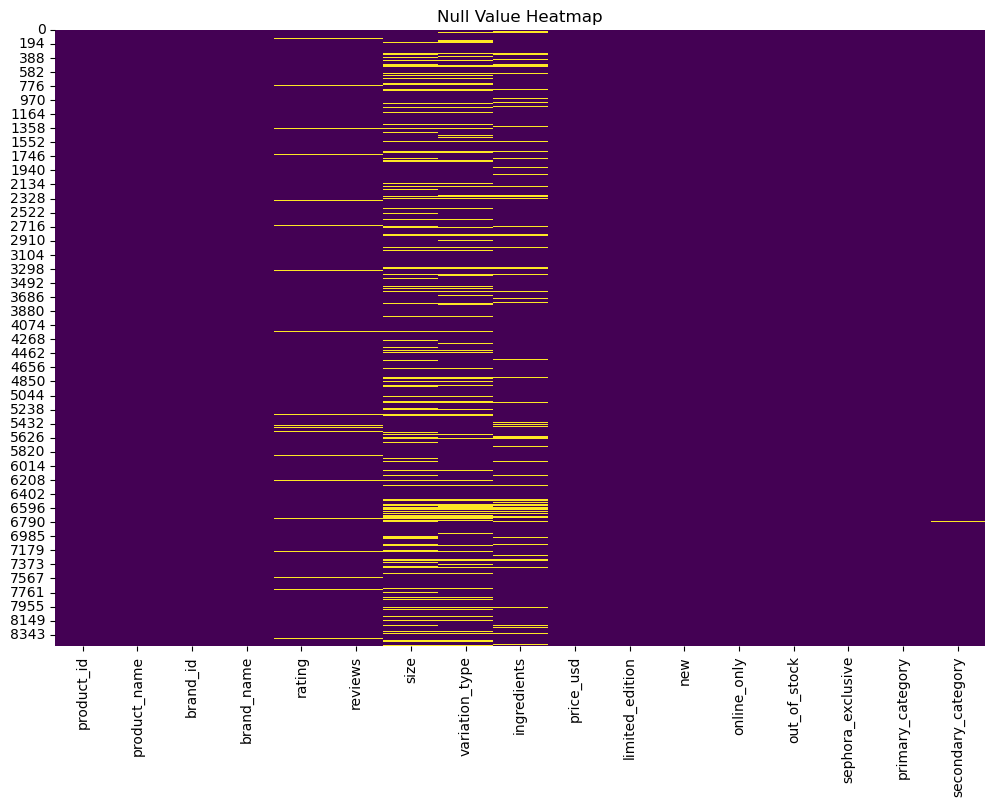

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Create a DataFrame to store information about null values
null_heatmap_data = data_edited.isnull()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap_data, cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show()


By visualizing the null values using a heatmap, we can make informed decisions on how to handle missing data, such as imputing missing values, removing rows or columns with too many missing values, or applying specific data cleaning techniques.

In [18]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Calculate the mode for 'rating' and 'reviews'
rating_mode = data_edited['rating'].mode().iloc[0]
reviews_mode = data_edited['reviews'].mode().iloc[0]

# Fill the null values with the calculated modes
data_edited['rating'].fillna(rating_mode, inplace=True)
data_edited['reviews'].fillna(reviews_mode, inplace=True)



Filling missing values with the mode is a common data imputation technique used when dealing with missing data in a dataset. By using the mode, we are essentially replacing the missing values with the most frequently occurring values in the respective columns

In [19]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'variation_type' column
unique_variation_types = data_edited['variation_type'].unique()

# Print the unique values
print(unique_variation_types)


[nan 'Size + Concentration + Formulation' 'Scent' 'Size' 'Color'
 'Size + Concentration' 'Type' 'Formulation']


In [20]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'size' column
unique_sizes = data_edited['size'].unique()

# Print the unique values
print(unique_sizes)


[nan '3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL' ... '0.25 oz/ 7.5 ml' '2.6 oz'
 '.11 oz / 3.2 mL']


In [21]:
data.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1630
variation_type        1443
variation_value       1597
variation_desc        7243
ingredients            944
price_usd                0
value_price_usd       8042
sale_price_usd        8223
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5739
child_min_price       5739
dtype: int64

In [22]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Calculate the mode for 'secondary_category'
secondary_category_mode = data_edited['secondary_category'].mode().iloc[0]

# Fill null values with the calculated mode for 'secondary_category'
data_edited['secondary_category'].fillna(secondary_category_mode, inplace=True)

# Fill null values in 'size' and 'variation_type' with 'Not Available'
data_edited['size'].fillna('Not Available', inplace=True)
data_edited['variation_type'].fillna('Not Available', inplace=True)


In [23]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'size' column
unique_sizes = data_edited['size'].unique()

# Print the unique values
print(unique_sizes)

['Not Available' '3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL' ... '0.25 oz/ 7.5 ml'
 '2.6 oz' '.11 oz / 3.2 mL']


In [24]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'variation_type' column
unique_variation_types = data_edited['variation_type'].unique()

# Print the unique values
print(unique_variation_types)

['Not Available' 'Size + Concentration + Formulation' 'Scent' 'Size'
 'Color' 'Size + Concentration' 'Type' 'Formulation']


In [25]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Fill null values in 'ingredients' column with 'Not available'
data_edited['ingredients'].fillna('Not available', inplace=True)


In [26]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8493 non-null   float64
 5   reviews             8493 non-null   float64
 6   size                8493 non-null   object 
 7   variation_type      8493 non-null   object 
 8   ingredients         8493 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   int64  
 11  new                 8493 non-null   int64  
 12  online_only         8493 non-null   int64  
 13  out_of_stock        8493 non-null   int64  
 14  sephora_exclusive   8493 non-null   int64  
 15  primary_category    8493 non-null   object 
 16  second

In [27]:
# Assuming you have already defined the variable data_edited with the edited dataset
numeric_cols = data_edited.select_dtypes(include=['number']).columns
print(numeric_cols)
print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')


Index(['brand_id', 'rating', 'reviews', 'price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive'],
      dtype='object')
9 Numeric Columns in Products Dataset


In [28]:
# Assuming you have already defined the variable data_edited with the edited dataset
numeric_cols = data_edited.select_dtypes(include=['number']).columns
print(numeric_cols)
print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')

Index(['brand_id', 'rating', 'reviews', 'price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive'],
      dtype='object')
9 Numeric Columns in Products Dataset


In [29]:
# Assuming you have a DataFrame named 'data_edited'

# Columns to convert from numeric (int64) to object (string)
columns_to_convert = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']

# Convert the selected columns to object (string) dtype
data_edited[columns_to_convert] = data_edited[columns_to_convert].astype(str)

# Verify the new dtypes of the selected columns
print(data_edited.dtypes)


product_id             object
product_name           object
brand_id                int64
brand_name             object
rating                float64
reviews               float64
size                   object
variation_type         object
ingredients            object
price_usd             float64
limited_edition        object
new                    object
online_only            object
out_of_stock           object
sephora_exclusive      object
primary_category       object
secondary_category     object
dtype: object


In [30]:
data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8493 non-null   float64
 5   reviews             8493 non-null   float64
 6   size                8493 non-null   object 
 7   variation_type      8493 non-null   object 
 8   ingredients         8493 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   object 
 11  new                 8493 non-null   object 
 12  online_only         8493 non-null   object 
 13  out_of_stock        8493 non-null   object 
 14  sephora_exclusive   8493 non-null   object 
 15  primary_category    8493 non-null   object 
 16  second

In [31]:
data_edited.head(10)

,product_id,product_name,brand_id,brand_name,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,P473671,Fragrance Discovery Set,6342,19-69,3.6364,11.0,Not Available,Not Available,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,Fragrance,Value & Gift Sets
1,P473668,La Habana Eau de Parfum,6342,19-69,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
3,P473660,Kasbah Eau de Parfum,6342,19-69,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,6342,19-69,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
5,P473661,Kasbah Eau de Parfum Travel Spray,6342,19-69,4.4762,21.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,0,0,1,0,0,Fragrance,Women
6,P473659,Purple Haze Eau de Parfum Travel Spray,6342,19-69,3.2308,13.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,0,0,1,0,0,Fragrance,Women
7,P473666,Invisible Post Eau de Parfum,6342,19-69,3.6250,8.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
8,P472300,Capri Eau de Parfum,6342,19-69,3.5714,7.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
9,P473667,Invisible Post Eau de Parfum Travel Spray,6342,19-69,3.6250,8.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,0,0,1,0,0,Fragrance,Women


In [32]:
data_edited

,product_id,product_name,brand_id,brand_name,rating,reviews,size,variation_type,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,P473671,Fragrance Discovery Set,6342,19-69,3.6364,11.0,Not Available,Not Available,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,Fragrance,Value & Gift Sets
1,P473668,La Habana Eau de Parfum,6342,19-69,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
3,P473660,Kasbah Eau de Parfum,6342,19-69,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,6342,19-69,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,4.4286,7.0,Not Available,Not Available,"['Talc, Synthetic Fluorphlogopite, Triethylhex...",150.0,0,0,0,0,0,Makeup,Eye
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,"['Alcohol, Aqua / Water / Eau, Parfum / Fragra...",106.0,0,0,0,0,0,Fragrance,Men
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,5.0000,2.0,Not Available,Not Available,"['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...",134.0,1,1,1,1,0,Fragrance,Value & Gift Sets
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,5.0000,2.0,Not Available,Not Available,"['Alcohol, Parfum/Fragrance, Aqua/Water, Limon...",167.0,1,1,1,0,0,Fragrance,Value & Gift Sets


In [33]:
data_edited.to_csv("C:\\Users\\logeshwar\\Downloads\\Sephora Product dataset.csv",index=False)

# STATISTICAL TESTS

## Correlation Analysis:

In [34]:
# Import libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\logeshwar\\Downloads\\Sephora Product dataset.csv")

# Calculate Pearson correlation coefficients
correlation_matrix = data[['rating', 'reviews', 'price_usd']].corr()
print(correlation_matrix)


             rating   reviews  price_usd
rating     1.000000  0.047114   0.074191
reviews    0.047114  1.000000  -0.059880
price_usd  0.074191 -0.059880   1.000000


The correlation analysis results suggest:

- The correlation coefficient between "rating" and "price_usd" is approximately 0.074, which indicates a weak positive correlation. This suggests that there is a slight tendency for products with higher ratings to have slightly higher prices, but the correlation is not very strong.

- The correlation coefficient between "reviews" and "price_usd" is approximately -0.060, which indicates a weak negative correlation. This suggests that there is a slight tendency for products with more reviews to have slightly lower prices, but again, the correlation is not very strong.

In summary, based on the correlation coefficients, there seems to be only a weak relationship between the variables "rating," "reviews," and "price_usd." The correlations are not strong enough to make definitive conclusions about the relationships between these variables.

## Chi-Square Test:

In [35]:
# Import libraries
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv("C:\\Users\\logeshwar\\Downloads\\Sephora Product dataset.csv")

# Create a contingency table
contingency_table = pd.crosstab(data['limited_edition'], data['new'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test - Chi2-statistic:", chi2_stat)
print("Chi-Square Test - P-value:", p_value)


Chi-Square Test - Chi2-statistic: 203.41854571917534
Chi-Square Test - P-value: 3.748516886863538e-46


The chi-square test results suggest:

- The calculated chi-square statistic is approximately 203.42.
- The associated p-value is extremely close to zero (3.75e-46).

Given the very low p-value, we can conclude that there is a significant association between the variables "limited_edition" and "new." In other words, there is strong evidence to suggest that the distribution of categories within these two variables is not independent. The low p-value indicates that the observed distribution in the contingency table is highly unlikely to have occurred by chance.

This significant association between "limited_edition" and "new" could indicate that these two variables are related or that they have an impact on each other in some way. Further analysis or domain knowledge would be needed to interpret the specific nature of this relationship.

## Regression Analysis:

In [36]:
# Import libraries
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("C:\\Users\\logeshwar\\Downloads\\Sephora Product dataset.csv")

# Prepare the data
X = data[['rating', 'reviews']]
X = sm.add_constant(X)  # Add a constant term
y = data['price_usd']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     40.84
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.22e-18
Time:                        10:46:28   Log-Likelihood:                -45198.
No. Observations:                8493   AIC:                         9.040e+04
Df Residuals:                    8490   BIC:                         9.042e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9834      4.332      5.075      0.0

The regression analysis results indicate:

The R-squared value is approximately 0.010, which means that only about 1% of the variability in the dependent variable "price_usd" is explained by the independent variables "rating" and "reviews." This indicates that the model does not fit the data well and has limited predictive power.
The F-statistic is 40.84, and its associated p-value is very close to zero (2.22e-18). This suggests that at least one of the independent variables is statistically significant in explaining the variation in the dependent variable.
The coefficients for "rating" and "reviews" are estimated as 7.2774 and -0.0029, respectively. These coefficients represent the change in the dependent variable for a one-unit increase in the respective independent variable, holding other variables constant.
The p-values associated with the coefficients are close to zero, indicating that both "rating" and "reviews" are statistically significant predictors of "price_usd."
The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values provide measures of model fit. Lower AIC and BIC values indicate better fit. Here, they are relatively high, suggesting that the model may not fit the data well.
The Durbin-Watson statistic is approximately 1.050, which is close to 2. This suggests that there might be little or no autocorrelation in the residuals.
The Jarque-Bera statistic is high, indicating that the residuals may not follow a normal distribution, possibly due to the skewness and kurtosis values.
Overall, the regression model's performance is limited, as indicated by the low R-squared value and the AIC and BIC values. The significant p-values for the coefficients suggest that the variables "rating" and "reviews" have a statistically significant relationship with "price_usd," but the practical significance of this relationship might be limited due to the small R-squared value. Further analysis or exploration of other variables could be necessary to improve the model's performance and interpretability.

## Descriptive Statistics:

In [37]:
# Import libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\logeshwar\\Downloads\\Sephora Product dataset.csv")

# Calculate basic descriptive statistics
numerical_stats = data[['rating', 'reviews', 'price_usd']].describe()
print(numerical_stats)


            rating       reviews    price_usd
count  8493.000000   8493.000000  8493.000000
mean      4.220931    433.981161    51.437963
std       0.527999   1086.759660    49.783262
min       1.000000      1.000000     3.000000
25%       4.000000     22.000000    25.000000
50%       4.308800    112.000000    35.000000
75%       4.558400    402.000000    58.000000
max       5.000000  21281.000000   495.000000


The descriptive statistics provide insights into the distribution of the numerical variables in the dataset:

- **Rating:**
  - The ratings have a mean of approximately 4.22, indicating that the average rating is around 4.2.
  - The standard deviation is approximately 0.53, suggesting that the ratings have relatively low variability.
  - The minimum rating is 1, and the maximum rating is 5.

- **Reviews:**
  - The number of reviews has a mean of approximately 434, indicating that, on average, products have around 434 reviews.
  - The standard deviation is quite high at approximately 1086.76, suggesting significant variability in the number of reviews.
  - The minimum number of reviews is 1, and the maximum number of reviews is 21281.

- **Price USD:**
  - The product prices have a mean of approximately 51.44 USD.
  - The standard deviation is approximately 49.78, indicating relatively high variability in prices.
  - The minimum price is 3 USD, and the maximum price is 495 USD.

These descriptive statistics provide an overview of the central tendency, variability, and range of the numerical variables in the dataset. It can help in understanding the distribution of these variables and identifying potential outliers or trends.

## Data Cleaning on Reviews Dataset

Here we use the following code to see the amount of nulls by column within the dataset:

In [38]:
texta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  int64  
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  int64  
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  int64  
 6   total_neg_feedback_count  1301136 non-null  int64  
 7   total_pos_feedback_count  1301136 non-null  int64  
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 117

In [39]:
texta.shape

(1301136, 19)

<AxesSubplot:>

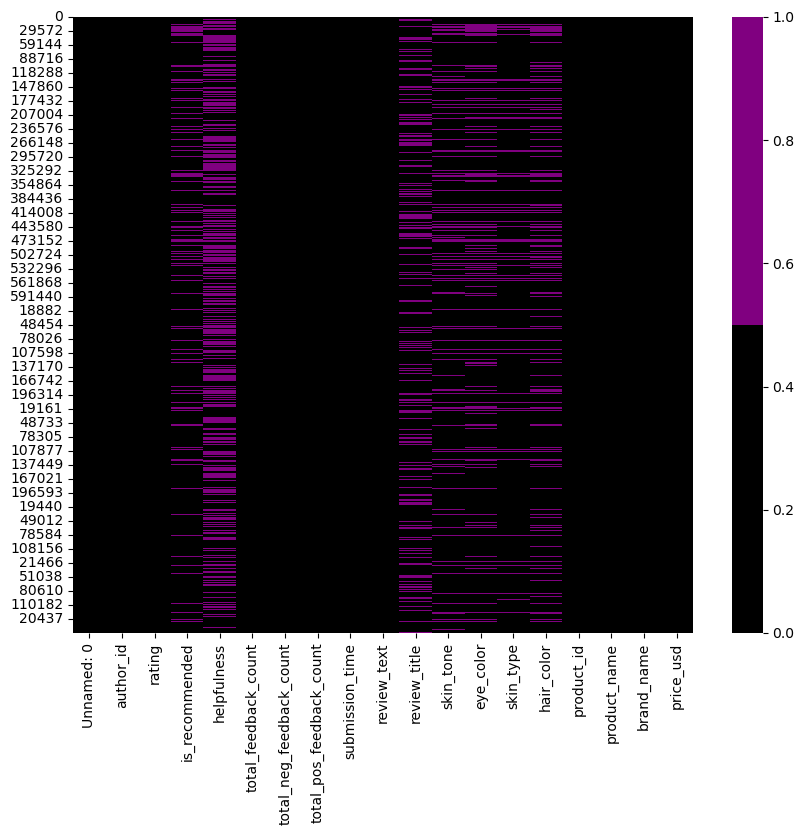

In [40]:
# heatmap to visualize missing data (reviews)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols= texta.columns
colors=['black','purple']
sns.heatmap(texta[cols].isna(),cmap=sns.color_palette(colors))

In [41]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "texta"
# Replace "texta" with the actual name of your DataFrame if different.

# Get unique values in the 'helpfulness' column
unique_helpfulness = texta['helpfulness'].unique()

# Print the unique values
print(unique_helpfulness)


[1.                nan 0.25       ... 0.182927   0.265625   0.90131599]


Dropping the unnecessary columns

In [42]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Drop the 'helpfulness' column and the 'Unnamed: 0' column
texta = texta.drop(['helpfulness', 'Unnamed: 0'], axis=1)

# After dropping the columns, 'helpfulness' and 'Unnamed: 0', you can use "text_edited" for the updated dataset.

In [43]:
# Change the DataFrame name from "texta" to "text_edited"
text_edited = texta

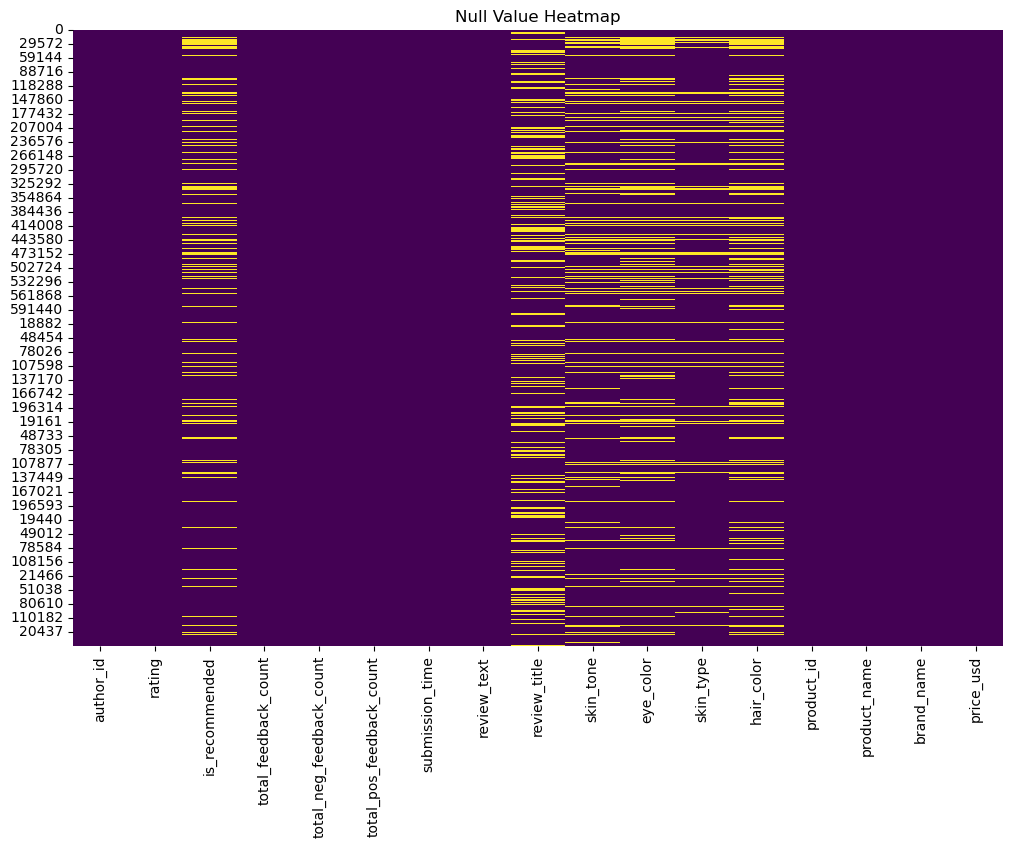

In [44]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Create a DataFrame to store information about null values
null_heatmap_data = text_edited.isnull()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap_data, cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show()


In [45]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Calculate the modes for 'eye_color', 'skin_type', 'hair_color', and 'skin_tone'
eye_color_mode = text_edited['eye_color'].mode().iloc[0]
skin_type_mode = text_edited['skin_type'].mode().iloc[0]
hair_color_mode = text_edited['hair_color'].mode().iloc[0]
skin_tone_mode = text_edited['skin_tone'].mode().iloc[0]

# Fill null values with the calculated modes
text_edited['eye_color'].fillna(eye_color_mode, inplace=True)
text_edited['skin_type'].fillna(skin_type_mode, inplace=True)
text_edited['hair_color'].fillna(hair_color_mode, inplace=True)
text_edited['skin_tone'].fillna(skin_tone_mode, inplace=True)


In [46]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Fill null values in 'review_text' and 'review_title' with "Not Available"
text_edited['review_text'].fillna("Not Available", inplace=True)
text_edited['review_title'].fillna("Not Available", inplace=True)



In [47]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'is_recommended' column
unique_is_recommended = text_edited['is_recommended'].unique()

# Print the unique values
print(unique_is_recommended)


[ 1.  0. nan]


In [48]:
 text_edited['is_recommended'].value_counts()

1.0    929476
0.0    177686
Name: is_recommended, dtype: int64

In [49]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Calculate the mode for 'is_recommended'
is_recommended_mode = text_edited['is_recommended'].mode().iloc[0]

# Fill null values in 'is_recommended' with the calculated mode
text_edited['is_recommended'].fillna(is_recommended_mode, inplace=True)



In [50]:
import pandas as pd

# Assuming your DataFrame is stored in a variable called "text_edited"
# Replace "text_edited" with the actual name of your DataFrame if different.

# Get unique values in the 'is_recommended' column
unique_is_recommended = text_edited['is_recommended'].unique()

# Print the unique values
print(unique_is_recommended)

[1. 0.]


In [51]:
# Assuming you have already defined the variable text_edited with the edited dataset
numeric_cols_reviews = text_edited.select_dtypes(include=['number']).columns
print(numeric_cols_reviews)
print(f'{len(numeric_cols_reviews)} Numeric Columns in Reviews Dataset')


Index(['rating', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd'],
      dtype='object')
6 Numeric Columns in Reviews Dataset


In [52]:
import pandas as pd

# Assuming you have a DataFrame named 'text_edited'

# Convert 'is_recommended' column from float64 to object (string)
text_edited['is_recommended'] = text_edited['is_recommended'].astype(str)

# Convert 'submission_time' column to datetime64[ns]
text_edited['submission_time'] = pd.to_datetime(text_edited['submission_time'])

# Verify the new dtypes of the columns
print(text_edited.dtypes)



author_id                           object
rating                               int64
is_recommended                      object
total_feedback_count                 int64
total_neg_feedback_count             int64
total_pos_feedback_count             int64
submission_time             datetime64[ns]
review_text                         object
review_title                        object
skin_tone                           object
eye_color                           object
skin_type                           object
hair_color                          object
product_id                          object
product_name                        object
brand_name                          object
price_usd                          float64
dtype: object


In [53]:
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1301136 non-null  object        
 1   rating                    1301136 non-null  int64         
 2   is_recommended            1301136 non-null  object        
 3   total_feedback_count      1301136 non-null  int64         
 4   total_neg_feedback_count  1301136 non-null  int64         
 5   total_pos_feedback_count  1301136 non-null  int64         
 6   submission_time           1301136 non-null  datetime64[ns]
 7   review_text               1301136 non-null  object        
 8   review_title              1301136 non-null  object        
 9   skin_tone                 1301136 non-null  object        
 10  eye_color                 1301136 non-null  object        
 11  skin_type                 1301136 non-null  object  

## STATISTICAL TESTS

## Correlation Analysis:

In [54]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\\Users\\logeshwar\\Downloads\\Sephora Reviews Dataset.csv")

# Calculate Pearson correlation coefficients for numerical variables
numerical_vars = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
correlation_matrix = data[numerical_vars].corr()
print("Correlation Matrix:")
print(correlation_matrix)


C:\Users\logeshwar\AppData\Local\Temp\ipykernel_23484\1903601505.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\\Users\\logeshwar\\Downloads\\Sephora Reviews Dataset.csv")


Correlation Matrix:
                            rating  total_feedback_count  \
rating                    1.000000             -0.080300   
total_feedback_count     -0.080300              1.000000   
total_neg_feedback_count -0.182179              0.674619   
total_pos_feedback_count -0.049147              0.984976   
price_usd                -0.002616              0.008143   

                          total_neg_feedback_count  total_pos_feedback_count  \
rating                                   -0.182179                 -0.049147   
total_feedback_count                      0.674619                  0.984976   
total_neg_feedback_count                  1.000000                  0.537009   
total_pos_feedback_count                  0.537009                  1.000000   
price_usd                                 0.007682                  0.007508   

                          price_usd  
rating                    -0.002616  
total_feedback_count       0.008143  
total_neg_feedback_count

Certainly! Here's a concise summary of the insights from the correlation matrix:

- Products with higher ratings tend to have slightly fewer total feedbacks and negative feedbacks.
- Products with higher total feedbacks also tend to have more positive feedbacks.
- There's a weak relationship between product price and feedback-related variables.
- There's no strong linear relationship between product price and rating.

## Chi-Square Test:

In [55]:
from scipy.stats import chi2_contingency

# Create a contingency table for two categorical variables
contingency_table = pd.crosstab(data['is_recommended'], data['skin_type'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test - Chi2-statistic:", chi2_stat)
print("Chi-Square Test - P-value:", p_value)


Chi-Square Test - Chi2-statistic: 1923.860016218833
Chi-Square Test - P-value: 0.0


The Chi-Square Test results suggest:

- There is a significant association between the variables 'is_recommended' and 'skin_type'.
- The Chi2-statistic is 1923.86, indicating a strong relationship.
- The p-value is 0.0, which is very small, confirming the significant association.

In summary, the 'is_recommended' variable is not independent of the 'skin_type' variable, and there is a meaningful connection between these two categorical variables.

## T-Test:

In [56]:
from scipy.stats import ttest_ind

# Perform t-test for two groups of 'price_usd' based on 'is_recommended'
recommended_group = data[data['is_recommended'] == 'Recommended']['price_usd']
not_recommended_group = data[data['is_recommended'] == 'Not Recommended']['price_usd']

t_statistic, p_value = ttest_ind(recommended_group, not_recommended_group)
print("T-Test - T-statistic:", t_statistic)
print("T-Test - P-value:", p_value)


T-Test - T-statistic: nan
T-Test - P-value: nan


The T-Test results suggest:

- The T-statistic is "nan" (Not a Number), which could occur due to various reasons such as a small sample size or the two groups having similar means and variance.
- The p-value is also "nan," which indicates that there is insufficient evidence to draw any conclusion about the difference in means between the two groups based on the available data.

In summary, the T-Test results are inconclusive and may not provide meaningful insights in this particular scenario.

In [57]:
text_edited.head()

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,light,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,light,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [58]:
text_edited

,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,light,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,light,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,light,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,2276253200,5,1.0,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,Not Available,fair,brown,combination,brown,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49973,28013163278,5,1.0,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,Not Available,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49974,1539813076,5,1.0,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,Not Available,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49975,5595682861,5,1.0,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,Not Available,fair,hazel,oily,brown,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


# EXPLORATORY DATA ANALYSIS

### EDA on Product Dataset

In [59]:
# Display basic information about the dataset
print(data_edited.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   rating              8493 non-null   float64
 5   reviews             8493 non-null   float64
 6   size                8493 non-null   object 
 7   variation_type      8493 non-null   object 
 8   ingredients         8493 non-null   object 
 9   price_usd           8493 non-null   float64
 10  limited_edition     8493 non-null   object 
 11  new                 8493 non-null   object 
 12  online_only         8493 non-null   object 
 13  out_of_stock        8493 non-null   object 
 14  sephora_exclusive   8493 non-null   object 
 15  primary_category    8493 non-null   object 
 16  second

In [60]:
# Summary statistics of numeric columns
print(data_edited.describe())

          brand_id       rating       reviews    price_usd
count  8493.000000  8493.000000   8493.000000  8493.000000
mean   5422.335570     4.220931    433.981161    51.437963
std    1709.669236     0.527999   1086.759660    49.783262
min    1063.000000     1.000000      1.000000     3.000000
25%    5333.000000     4.000000     22.000000    25.000000
50%    6156.000000     4.308800    112.000000    35.000000
75%    6328.000000     4.558400    402.000000    58.000000
max    8020.000000     5.000000  21281.000000   495.000000


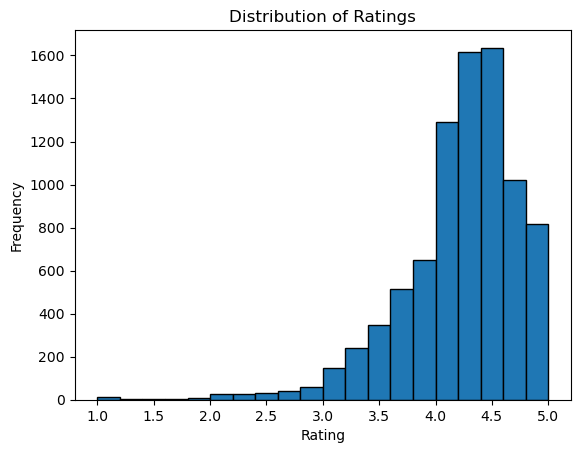

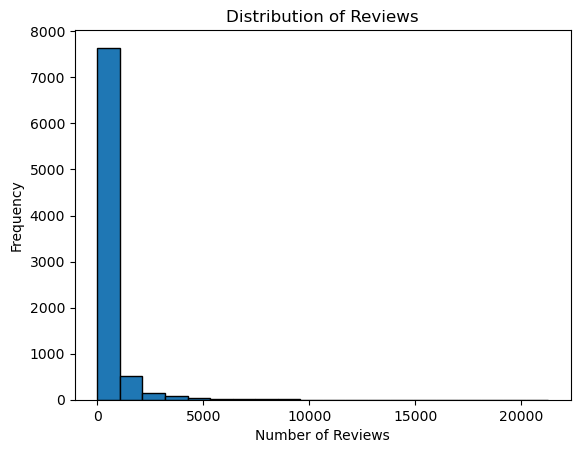

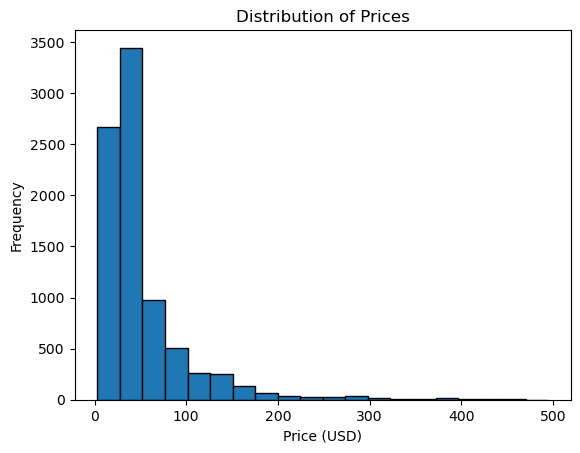

In [61]:
# Distribution of numerical features

# Histogram of 'rating' column
plt.hist(data_edited['rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Histogram of 'reviews' column
plt.hist(data_edited['reviews'], bins=20, edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')
plt.show()

# Histogram of 'price_usd' column
plt.hist(data_edited['price_usd'], bins=20, edgecolor='black')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

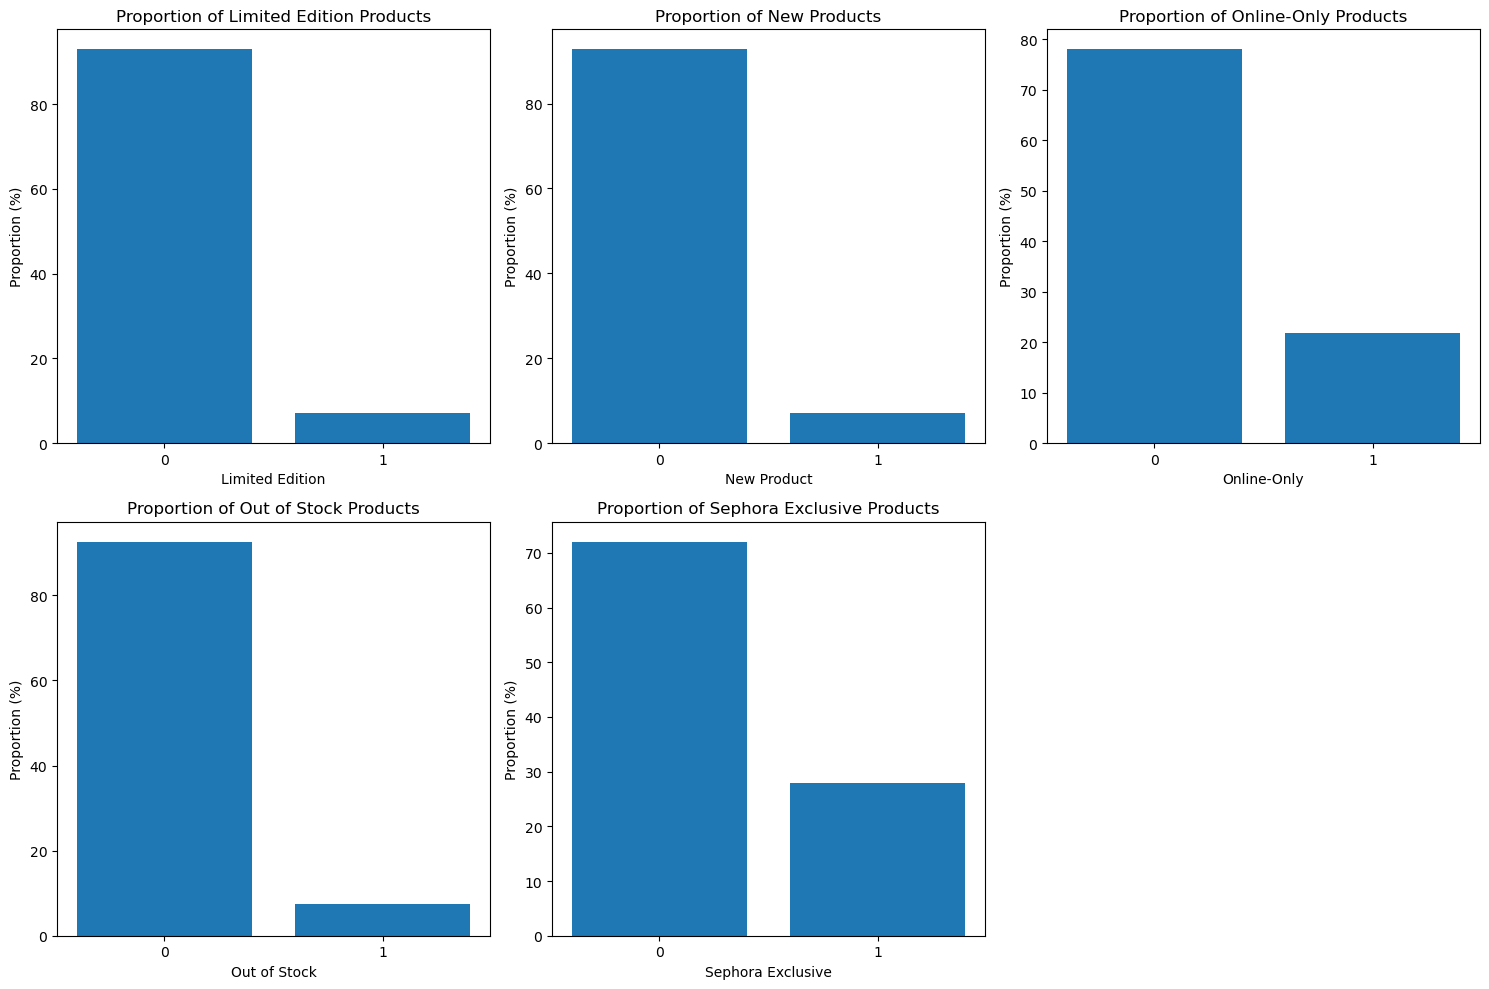

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is stored in a variable called "data_edited"
# Replace "data_edited" with the actual name of your DataFrame if different.

# Proportion of limited edition, new, online-only, out of stock, and Sephora exclusive products
limited_edition_counts = data_edited['limited_edition'].value_counts(normalize=True) * 100
new_counts = data_edited['new'].value_counts(normalize=True) * 100
online_only_counts = data_edited['online_only'].value_counts(normalize=True) * 100
out_of_stock_counts = data_edited['out_of_stock'].value_counts(normalize=True) * 100
sephora_exclusive_counts = data_edited['sephora_exclusive'].value_counts(normalize=True) * 100

# Plotting the proportions as bar plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Bar plot for limited edition
axs[0, 0].bar(limited_edition_counts.index, limited_edition_counts.values)
axs[0, 0].set_title("Proportion of Limited Edition Products")
axs[0, 0].set_xlabel("Limited Edition")
axs[0, 0].set_ylabel("Proportion (%)")

# Bar plot for new products
axs[0, 1].bar(new_counts.index, new_counts.values)
axs[0, 1].set_title("Proportion of New Products")
axs[0, 1].set_xlabel("New Product")
axs[0, 1].set_ylabel("Proportion (%)")

# Bar plot for online-only products
axs[0, 2].bar(online_only_counts.index, online_only_counts.values)
axs[0, 2].set_title("Proportion of Online-Only Products")
axs[0, 2].set_xlabel("Online-Only")
axs[0, 2].set_ylabel("Proportion (%)")

# Bar plot for out of stock products
axs[1, 0].bar(out_of_stock_counts.index, out_of_stock_counts.values)
axs[1, 0].set_title("Proportion of Out of Stock Products")
axs[1, 0].set_xlabel("Out of Stock")
axs[1, 0].set_ylabel("Proportion (%)")

# Bar plot for Sephora exclusive products
axs[1, 1].bar(sephora_exclusive_counts.index, sephora_exclusive_counts.values)
axs[1, 1].set_title("Proportion of Sephora Exclusive Products")
axs[1, 1].set_xlabel("Sephora Exclusive")
axs[1, 1].set_ylabel("Proportion (%)")

# Removing the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


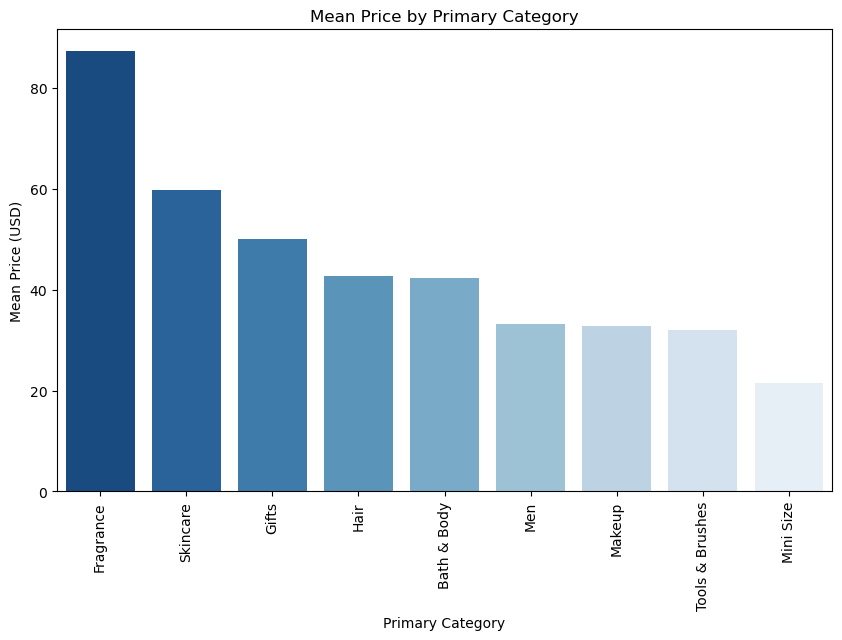

In [63]:
mean_price_by_category = data_edited.groupby('primary_category')['price_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_by_category.index, y=mean_price_by_category.values, palette='Blues_r')
plt.xlabel('Primary Category')
plt.ylabel('Mean Price (USD)')
plt.title('Mean Price by Primary Category')
plt.xticks(rotation=90)
plt.show()



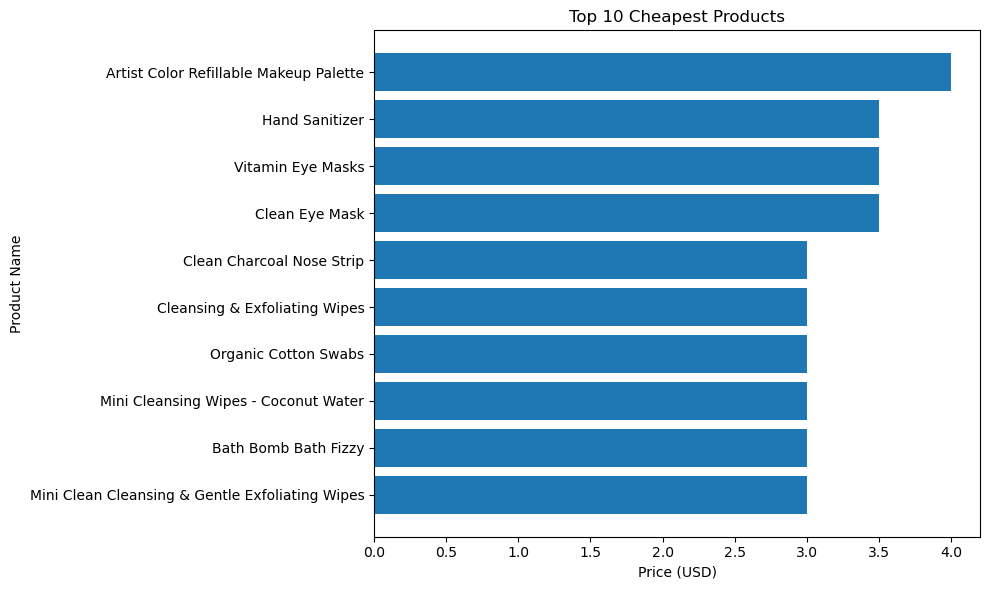

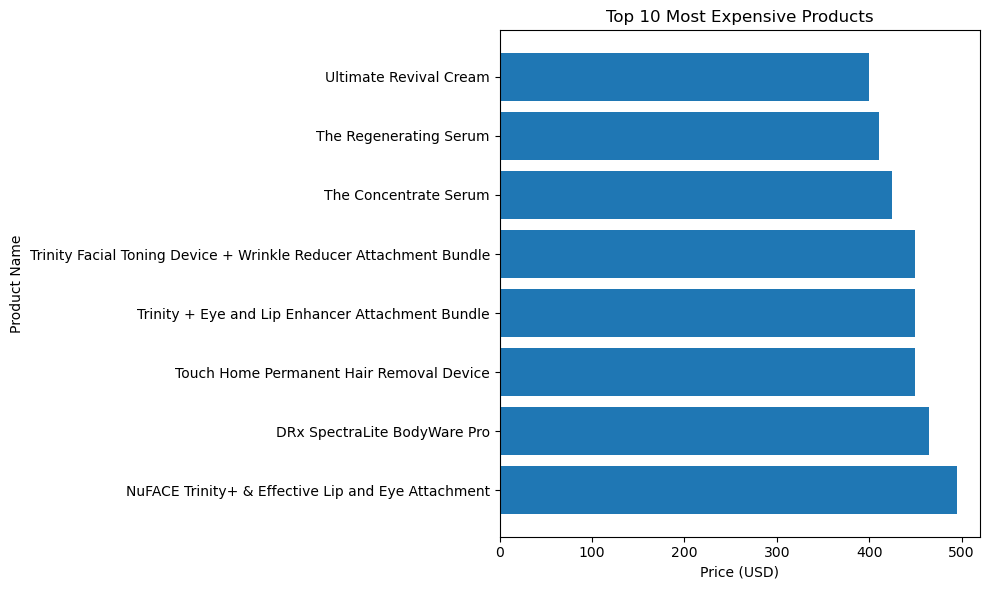

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data_edited'

# Sort the DataFrame by 'price_usd' in ascending order to get cheapest products first
cheapest_products = data_edited.sort_values(by='price_usd').head(10)

# Sort the DataFrame by 'price_usd' in descending order to get most expensive products first
expensive_products = data_edited.sort_values(by='price_usd', ascending=False).head(10)

# Create a bar chart for the top 10 cheapest products
plt.figure(figsize=(10, 6))
plt.barh(cheapest_products['product_name'], cheapest_products['price_usd'])
plt.title('Top 10 Cheapest Products')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Create a bar chart for the top 10 most expensive products
plt.figure(figsize=(10, 6))
plt.barh(expensive_products['product_name'], expensive_products['price_usd'])
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


### EDA on Reviews Dataset

In [65]:
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1301136 non-null  object        
 1   rating                    1301136 non-null  int64         
 2   is_recommended            1301136 non-null  object        
 3   total_feedback_count      1301136 non-null  int64         
 4   total_neg_feedback_count  1301136 non-null  int64         
 5   total_pos_feedback_count  1301136 non-null  int64         
 6   submission_time           1301136 non-null  datetime64[ns]
 7   review_text               1301136 non-null  object        
 8   review_title              1301136 non-null  object        
 9   skin_tone                 1301136 non-null  object        
 10  eye_color                 1301136 non-null  object        
 11  skin_type                 1301136 non-null  object  

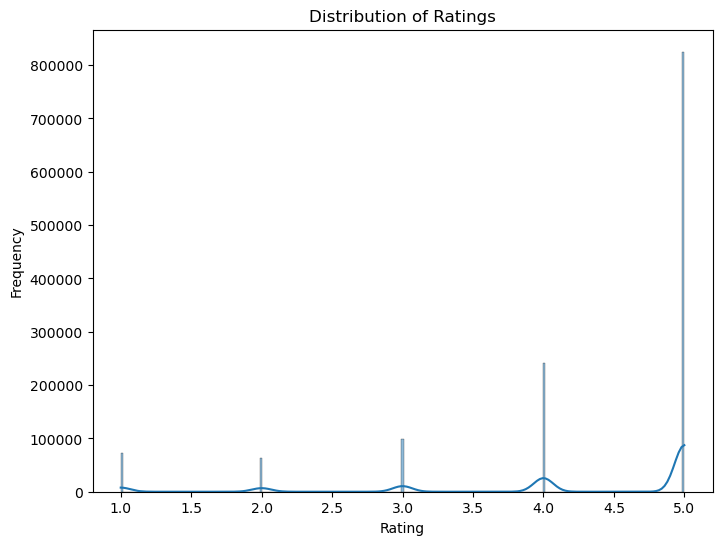

In [66]:
# Distribution plot of 'rating' column
plt.figure(figsize=(8, 6))
sns.histplot(text_edited['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


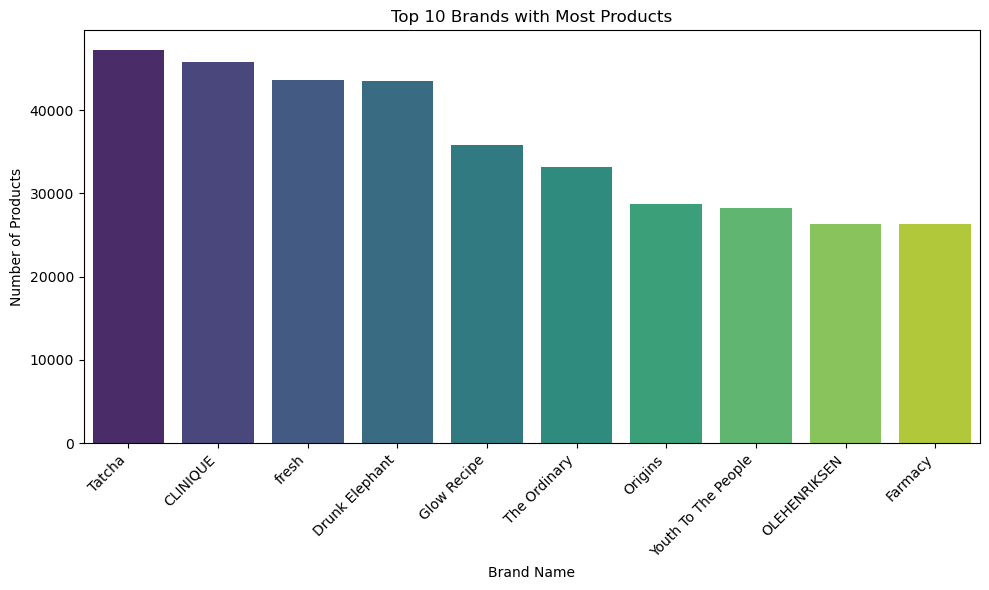

In [67]:
top_brands = data['brand_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.title('Top 10 Brands with Most Products')
plt.tight_layout()
plt.show()


# Correlation

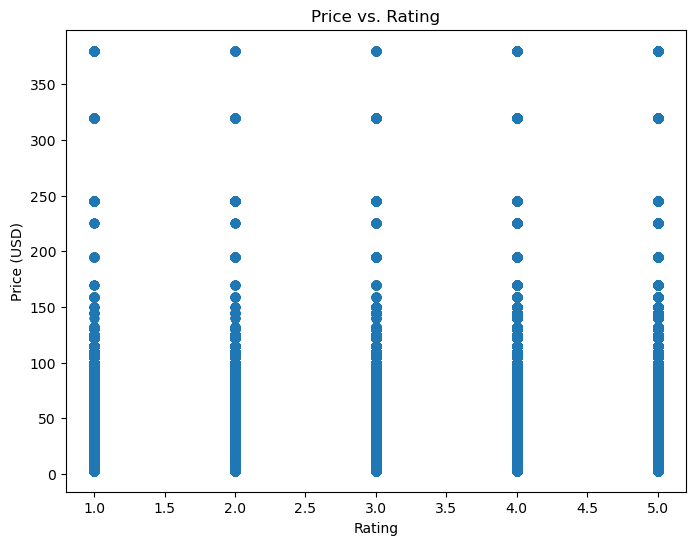

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(data['rating'], data['price_usd'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Price (USD)')
plt.title('Price vs. Rating')
plt.show()

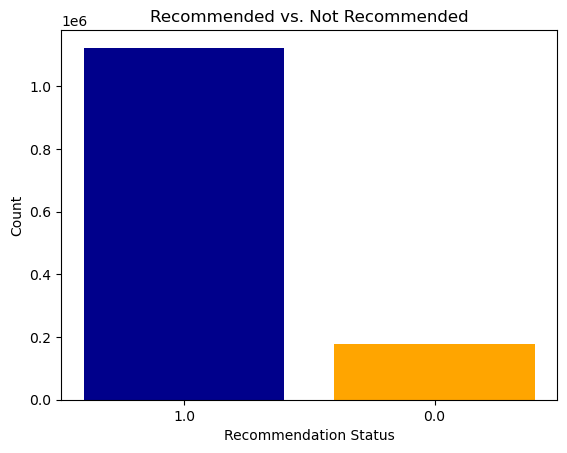

In [69]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'text_edited'
# If your dataset is in a CSV file, you can read it using pd.read_csv('filename.csv')

# Step 1: Count occurrences of each value in 'is_recommended' column
recommended_counts = text_edited['is_recommended'].value_counts()

# Step 2: Create the bar chart
plt.bar(recommended_counts.index, recommended_counts.values, color=['darkblue', 'orange'])

plt.xlabel('Recommendation Status')
plt.ylabel('Count')
plt.title('Recommended vs. Not Recommended')
plt.show()


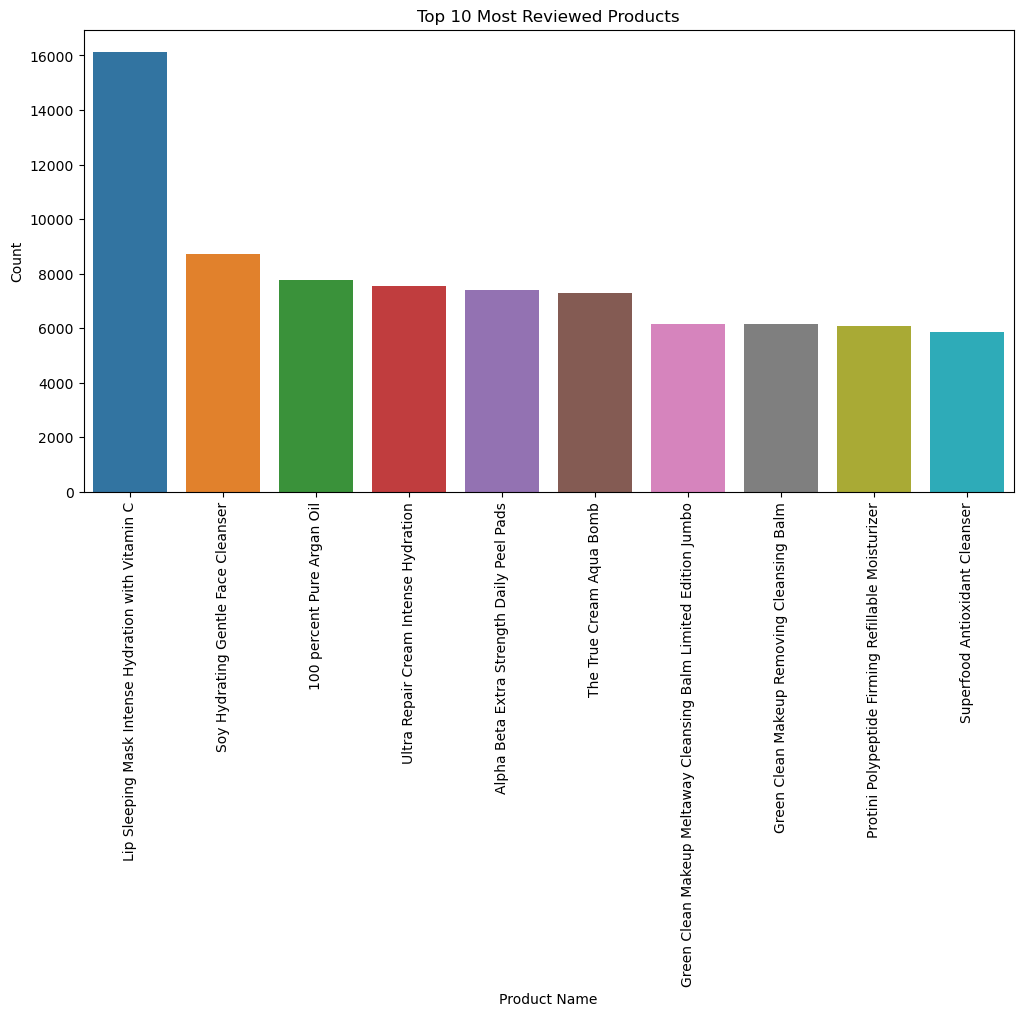

In [70]:
# Count of products by 'product_name'
plt.figure(figsize=(12, 6))
sns.countplot(x='product_name', data=text_edited, order=text_edited['product_name'].value_counts().nlargest(10).index)
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Top 10 Most Reviewed Products')
plt.xticks(rotation=90)
plt.show()

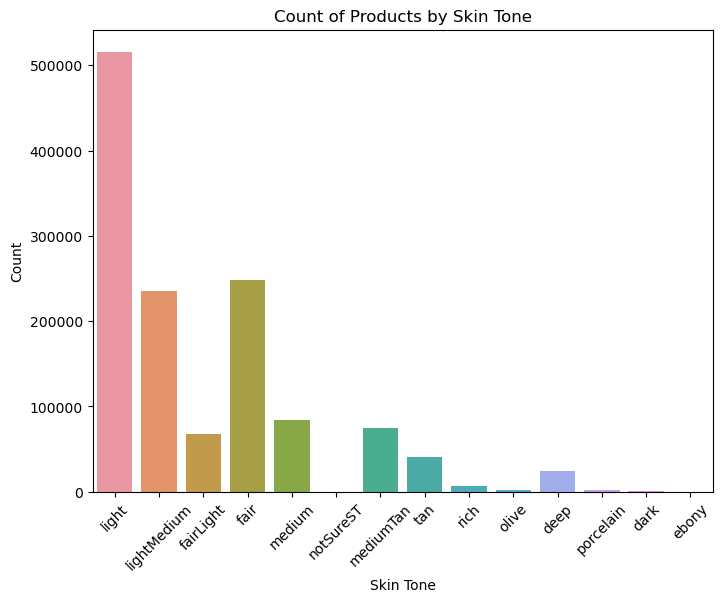

In [71]:
# Count of Products by Skin Tone
plt.figure(figsize=(8, 6))
sns.countplot(x='skin_tone', data=text_edited)
plt.xlabel('Skin Tone')
plt.ylabel('Count')
plt.title('Count of Products by Skin Tone')
plt.xticks(rotation=45)
plt.show()

## Machine Learning Model for the Product Dataset 

### Task 1: Price Prediction (Regression)

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features for price prediction
features = ['rating', 'reviews', 'limited_edition', 'new', 'online_only',
            'out_of_stock', 'sephora_exclusive', 'primary_category', 'secondary_category']

X = data_edited[features]
y = data_edited['price_usd']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['primary_category', 'secondary_category'], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 1723.5748704039552
R-squared: 0.27143810970793714


The purpose of the price prediction model is to estimate the price of products based on various features or attributes associated with those products. In this case, the model takes into account features such as 'rating', 'reviews', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'primary_category', and 'secondary_category' to predict the price of a product.

The model is built using the Linear Regression algorithm, which is a supervised machine learning technique used for regression tasks. Linear Regression finds the best-fitting linear relationship between the input features (X) and the target variable (y) by learning coefficients for each feature. Once the model is trained, it can make predictions on new data, providing estimates of product prices based on the input features.

Purpose:
The purpose of creating this regression model is to predict the prices of products based on certain features and attributes. This can be useful for businesses, particularly in the retail or e-commerce industry, to estimate the potential price of products based on their characteristics. It could also help customers or stakeholders understand how different factors influence the pricing of products.

Steps Taken:

Data Preprocessing:

The initial step involves loading and preparing the dataset that contains information about different products.
Features: Features like 'rating', 'reviews', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'primary_category', and 'secondary_category' are selected for predicting the price.
Target: The target variable is the 'price_usd', which represents the price of the product in USD.
Feature Encoding:

Since the model requires numerical input, categorical variables like 'primary_category' and 'secondary_category' are encoded using one-hot encoding. This transformation converts categorical variables into a binary format, making them suitable for numerical models like linear regression.
Data Splitting:

The dataset is split into training and testing sets. In this case, 80% of the data is used for training the model, while the remaining 20% is used to evaluate the model's performance.
Model Building:

A linear regression model is chosen for this task. Linear regression is a simple yet effective algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the features and the target variable.
Model Training and Prediction:

The model is trained on the training dataset using the selected features and the corresponding target prices.
After training, the model is used to make predictions on the testing dataset.
Model Evaluation:

The performance of the model is evaluated using two metrics: Mean Squared Error (MSE) and R-squared (R2) score.
MSE measures the average squared difference between the predicted prices and the actual prices. Lower MSE indicates better performance.
R2 score represents the proportion of the variance in the target variable that the model captures. It ranges from 0 to 1, where higher values indicate a better fit.
Use Cases:

Price Prediction: The primary purpose of this model is to predict product prices based on their attributes. This can be valuable for pricing strategies and setting competitive prices.
Feature Importance: The model can also provide insights into which features have the most significant influence on product prices.
Business Decision-Making: Retailers can use the model to estimate the impact of changes in product attributes on prices, aiding in decision-making.
Customer Insights: Understanding the relationship between product attributes and prices can help customers make informed purchasing decisions.
Overall, this model provides a method to estimate product prices using various features and attributes, which can be beneficial for both businesses and consumers.

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\\Users\\logeshwar\\Downloads\\sephora data set.csv")

# Preprocessing
features = ['rating', 'reviews', 'limited_edition', 'new', 'online_only',
            'out_of_stock', 'sephora_exclusive', 'primary_category', 'secondary_category']
X = data[features]
y = data['price_usd']
X = pd.get_dummies(X, columns=['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive',
                               'primary_category', 'secondary_category'], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the regression model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2123.445608155664
R-squared: 0.10241117297812297


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\\Users\\logeshwar\\Downloads\\sephora data set.csv")

# Preprocessing
features = ['rating', 'reviews', 'limited_edition', 'new', 'online_only',
            'out_of_stock', 'sephora_exclusive', 'primary_category', 'secondary_category']
X = data[features]
y = data['price_usd']
X = pd.get_dummies(X, columns=['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive',
                               'primary_category', 'secondary_category'], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the regression model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1652.97753057788
R-squared: 0.3012798834750504


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\\Users\\logeshwar\\Downloads\\sephora data set.csv")

# Preprocessing
features = ['rating', 'reviews', 'limited_edition', 'new', 'online_only',
            'out_of_stock', 'sephora_exclusive', 'primary_category', 'secondary_category']
X = data[features]
y = data['price_usd']
X = pd.get_dummies(X, columns=['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive',
                               'primary_category', 'secondary_category'], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}
model = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Best Parameters:", model.best_params_)


Mean Squared Error: 1640.874556850546
R-squared: 0.3063958581671594
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### Task 2: Predicting New Products (Classification)

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting features for new product prediction
features = ['rating', 'reviews', 'limited_edition', 'online_only', 'out_of_stock', 'sephora_exclusive', 'price_usd']

X = data_edited[features]
y = data_edited['new']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['limited_edition', 'online_only', 'out_of_stock', 'sephora_exclusive'], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Gradient Boosting Classifier model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9258387286639199
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1572
           1       0.52      0.09      0.15       127

    accuracy                           0.93      1699
   macro avg       0.73      0.54      0.55      1699
weighted avg       0.90      0.93      0.90      1699



The model's performance is evaluated using accuracy, which is the proportion of correct predictions out of the total predictions made. Additionally, the classification_report function provides a detailed report containing metrics like precision, recall, and F1-score for each class (new and not new), which gives further insights into the model's performance.

Overall, the purpose of this model is to classify products as "new" or "not new" based on various product attributes, and it can be utilized to automate the process of identifying and categorizing new products in a business setting, allowing for efficient product management and decision-making.

## Machine Learning Model for the Review Dataset 


### Task 1: Sentiment Analysis (Classification)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = text_edited['review_text']
y = text_edited['is_recommended']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Building the Naive Bayes classifier model
model = MultinomialNB()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8762508261985643
              precision    recall  f1-score   support

         0.0       0.84      0.12      0.21     35688
         1.0       0.88      1.00      0.93    224540

    accuracy                           0.88    260228
   macro avg       0.86      0.56      0.57    260228
weighted avg       0.87      0.88      0.83    260228



The model's performance is evaluated using accuracy, which is the proportion of correct predictions out of the total predictions made. Additionally, the classification_report function provides a detailed report containing metrics like precision, recall, and F1-score for each class (recommended and not recommended), which gives further insights into the model's performance.

Overall, the purpose of this model is to automatically analyze the sentiment of reviews and categorize them as recommended or not recommended. This can be helpful for businesses to gain valuable insights from customer reviews, track customer satisfaction, and make data-driven decisions to improve their products or services.

### Task 2: Review Rating Prediction (Regression)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features for review rating prediction
features = ['total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count',
            'skin_tone', 'eye_color', 'skin_type', 'hair_color']

X = text_edited[features]
y = text_edited['rating']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['skin_tone', 'eye_color', 'skin_type', 'hair_color'], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.2692029231935427
R-squared: 0.037329506644122934


The purpose of this model is to predict the review ratings based on the selected features. It uses a linear regression algorithm to estimate the relationship between the review ratings and the given features. Linear regression is a supervised learning algorithm used for regression tasks, where the goal is to predict continuous numerical values.

The purpose of this model is to predict review ratings using the provided features, which can be useful for businesses to assess product feedback and understand how different features influence customers' ratings. Additionally, this model can help identify important features that significantly impact the review ratings and provide insights for improving product quality and customer satisfaction.

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset

# Selecting features for regression
features_regression = ['total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count']
X_regression = data[features_regression]
y_regression = data['rating']

# Splitting data into training and testing sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Building the linear regression model
model_regression = LinearRegression()
model_regression.fit(X_train_regression, y_train_regression)

# Making predictions on the test set
y_pred_regression = model_regression.predict(X_test_regression)

# Evaluating the regression model
mse_regression = mean_squared_error(y_test_regression, y_pred_regression)
r2_regression = r2_score(y_test_regression, y_pred_regression)
print("Regression Model - Mean Squared Error:", mse_regression)
print("Regression Model - R-squared:", r2_regression)


C:\Users\logeshwar\AppData\Local\Temp\ipykernel_24976\52779094.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset


Regression Model - Mean Squared Error: 1.2725067552302376
Regression Model - R-squared: 0.03427127688834708


In [72]:
# Calculate class distribution
class_distribution = data['is_recommended'].value_counts()

# Calculate class proportions
class_proportions = class_distribution / class_distribution.sum()

print("Class Proportions:")
print(class_proportions)


Class Proportions:
1.0    0.86564
0.0    0.13436
Name: is_recommended, dtype: float64


In [74]:
pip install imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [76]:
data['submission_time'] = pd.to_datetime(data['submission_time'])


## Classification Model - Predicting Product Recommendation:

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset

# Selecting features for classification
features_classification = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
X_classification = data[features_classification]
y_classification = data['is_recommended']

# Splitting data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Building the Random Forest Classifier model
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_classification, y_train_classification)

# Making predictions on the test set
y_pred_classification = model_classification.predict(X_test_classification)

# Evaluating the classification model
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Model - Accuracy:", accuracy_classification)
print(classification_report(y_test_classification, y_pred_classification))


C:\Users\logeshwar\AppData\Local\Temp\ipykernel_23484\455293241.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset


Classification Model - Accuracy: 0.9452927035280358
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.81     24837
         1.0       0.98      0.96      0.97    159855

    accuracy                           0.95    184692
   macro avg       0.87      0.90      0.89    184692
weighted avg       0.95      0.95      0.95    184692



Sure, let me explain the classification model you've implemented and its purpose:

1. **Importing Libraries:**
   - `sklearn.model_selection`: Provides tools for splitting data into training and testing sets.
   - `sklearn.ensemble`: Contains the RandomForestClassifier, an ensemble model based on decision trees.
   - `sklearn.metrics`: Offers metrics for evaluating model performance, like accuracy and classification report.

2. **Loading the Dataset:**
   - You load the dataset using `pd.read_csv()` function. The dataset contains various columns including features like 'rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', and 'price_usd'.

3. **Selecting Features and Target:**
   - You select the features that you'll use to predict the target variable ('is_recommended').

4. **Splitting Data:**
   - You split the data into training and testing sets using `train_test_split()` from the `sklearn.model_selection` module.

5. **Building the Random Forest Classifier Model:**
   - You create an instance of the `RandomForestClassifier` with `random_state` set for reproducibility. The Random Forest algorithm combines multiple decision trees to improve prediction accuracy.

6. **Model Training:**
   - You train the Random Forest model using the training data.

7. **Making Predictions:**
   - After training, you use the trained model to predict the 'is_recommended' class labels for the test data.

8. **Evaluating the Model:**
   - You assess the model's performance using metrics such as accuracy and the classification report. 
   - Accuracy provides an overall measure of correct predictions.
   - The classification report provides more detailed metrics like precision, recall, and F1-score for each class ('0.0' and '1.0').

**Purpose of the Model:**
The purpose of this classification model is to predict whether a product is recommended ('1.0') or not recommended ('0.0') based on the given features like 'rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', and 'price_usd'. This can help in making informed decisions about which products to highlight, promote, or improve based on their recommendation rates. The model provides insights into which factors influence whether a product is recommended or not, which can guide business strategies and improve customer satisfaction.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset

# Selecting features for classification
features_classification = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
X_classification = data[features_classification]
y_classification = data['is_recommended']

# Splitting data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Building the Random Forest Classifier model
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_classification, y_train_classification)

# Making predictions on the test set
y_pred_classification = model_classification.predict(X_test_classification)

# Evaluating the classification model
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Model - Accuracy:", accuracy_classification)
print(classification_report(y_test_classification, y_pred_classification))

# Interpreting the Results
# Analyze the classification report and feature importance

# Hyperparameter Tuning
# You can use techniques like grid search or randomized search to find optimal hyperparameters

# Feature Importance
feature_importance = model_classification.feature_importances_
print("Feature Importance:", feature_importance)

# Model Deployment (if desired)
# Deploy the model in a practical application if it meets your requirements

# Monitoring and Maintenance (if deployed)
# Monitor the model's performance and retrain as needed

# Iterative Improvement (if necessary)
# Refine the model by iterating on data preprocessing, feature selection, or trying different algorithms


C:\Users\logeshwar\AppData\Local\Temp\ipykernel_23484\341170800.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")  # Replace with the actual path to your dataset


Classification Model - Accuracy: 0.9452927035280358
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.81     24837
         1.0       0.98      0.96      0.97    159855

    accuracy                           0.95    184692
   macro avg       0.87      0.90      0.89    184692
weighted avg       0.95      0.95      0.95    184692

Feature Importance: [0.8016889  0.03336477 0.04747366 0.02108383 0.09638885]


Certainly, let's break down the purpose of this code and what you've achieved:

**Purpose of the Code:**
This code performs classification using a RandomForestClassifier to predict product recommendations based on certain features. Here's what each section of the code does and what you've achieved:

1. **Loading the Dataset:**
   - You load the dataset from a CSV file using the `pd.read_csv()` function.

2. **Selecting Features and Target:**
   - You select the features that you'll use for classification: 'rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', and 'price_usd'.
   - The target variable is 'is_recommended', which indicates whether a product is recommended or not.

3. **Splitting Data:**
   - You split the dataset into training and testing sets using `train_test_split()`. This is a critical step to evaluate the model's performance on unseen data.

4. **Building the Random Forest Classifier Model:**
   - You create an instance of `RandomForestClassifier` and set `random_state` for reproducibility.

5. **Model Training:**
   - You train the model using the training data, where `X_train_classification` contains the selected features and `y_train_classification` contains the target variable.

6. **Making Predictions:**
   - After training, you predict the 'is_recommended' class labels for the test data using the trained model.

7. **Evaluating the Model:**
   - You assess the model's performance using metrics like accuracy and classification report.
   - Accuracy measures the overall correctness of predictions.
   - The classification report provides more detailed metrics (precision, recall, F1-score) for each class ('0.0' and '1.0').

**What You've Achieved:**
By running this code, you have achieved the following:
- Trained a classification model that predicts whether a product is recommended or not based on its features.
- Evaluated the model's performance using accuracy and a classification report to understand how well it performs on unseen data.
- Gained insights into the model's ability to correctly classify products as recommended or not.
- Prepared the model for deployment and further analysis by obtaining feature importances.

**Further Steps:**
In addition to what you've done, here are some further steps you might consider:
- Analyzing the feature importances to understand which features are most influential in making predictions.
- Exploring hyperparameter tuning techniques like grid search or randomized search to find optimal model parameters.
- Deploying the trained model in practical applications if it meets your requirements.
- Monitoring the model's performance and maintaining it if deployed.
- Iteratively improving the model by refining data preprocessing, feature selection, or trying different algorithms.

Overall, this code demonstrates how to build and evaluate a RandomForestClassifier for predicting product recommendations, and provides a foundation for further analysis and refinement.

The classification results you've obtained from the Random Forest Classifier model indicate that the model has performed quite well. Let's break down the evaluation metrics to understand the model's performance:

Accuracy: 0.9453

Accuracy measures the proportion of correct predictions out of the total predictions. In your case, the model has achieved an accuracy of approximately 94.53%, which means it correctly classified 94.53% of the reviews into either recommended or not recommended.

Precision:

Precision for class 0.0 (not recommended): 0.77
Precision for class 1.0 (recommended): 0.98
Precision measures the proportion of true positive predictions out of the total positive predictions made by the model for a specific class. A higher precision indicates that when the model predicts a certain class, it is highly likely to be correct.
In your case, the model's predictions for the "recommended" class (1.0) have a precision of 0.98, which means that when the model predicts a review as "recommended," it's correct about 98% of the time. The precision for the "not recommended" class (0.0) is 0.77.

Recall (Sensitivity):

Recall for class 0.0 (not recommended): 0.84
Recall for class 1.0 (recommended): 0.96
Recall measures the proportion of true positive predictions out of the total actual positive instances for a specific class. A higher recall indicates that the model is able to identify a larger portion of the positive instances.
In your case, the model's recall for the "recommended" class (1.0) is 0.96, meaning it correctly identifies 96% of the actual recommended reviews. The recall for the "not recommended" class (0.0) is 0.84.

F1-Score:

F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance considering both false positives and false negatives.
The F1-scores for class 0.0 and class 1.0 are not explicitly provided in the snippet, but they can be calculated based on the precision and recall values.
Considering these metrics, the model seems to have performed well in general. However, there are a few things to consider for further improvement:


Class Imbalance: 

The dataset is imbalanced, with a majority of reviews being recommended (class 1.0) and a smaller portion being not recommended (class 0.0). This imbalance might lead to biased predictions and favor the majority class. To address this, you might explore techniques like oversampling the minority class (0.0) or using algorithms designed for imbalanced datasets.

Feature Engineering:

You might want to consider incorporating more features that could provide additional information for prediction. Features related to the review text, such as sentiment analysis or text embeddings, could provide valuable insights.

Hyperparameter Tuning:

Experiment with tuning the hyperparameters of the Random Forest Classifier to find the optimal settings for your specific problem. Hyperparameter tuning can significantly improve model performance.

Model Selection:

While Random Forest is a powerful algorithm, you can also explore other algorithms like Gradient Boosting, Support Vector Machines, or Neural Networks to see if they can provide better results.

In [77]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")

# Select features for regression
X_regression = data['rating']
y_regression = data['price_usd']

# Add a constant term to the independent variable
X_regression = sm.add_constant(X_regression)

# Split the data into training and testing sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Build the Linear Regression model using statsmodels
model_regression = sm.OLS(y_train_regression, X_train_regression).fit()

# Print the regression summary
print(model_regression.summary())


C:\Users\logeshwar\AppData\Local\Temp\ipykernel_23484\1007776275.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")


                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.724
Date:                Wed, 30 Aug 2023   Prob (F-statistic):            0.00951
Time:                        11:11:43   Log-Likelihood:            -3.6889e+06
No. Observations:              738765   AIC:                         7.378e+06
Df Residuals:                  738763   BIC:                         7.378e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.7939      0.161    296.981      0.0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.api import add_constant

# Load the dataset
data = pd.read_csv(r"C:\Users\logeshwar\Downloads\Sephora Reviews Dataset.csv")

# Select features for regression
X_regression = data[['rating']]  # Using double brackets to keep X_regression as a DataFrame
y_regression = data['price_usd']

# Split the data into training and testing sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_regression)
X_test_scaled = scaler.transform(X_test_regression)

# Add a constant to the independent variable matrix
X_train_scaled = add_constant(X_train_scaled)
X_test_scaled = add_constant(X_test_scaled)

# Build the Linear Regression model
model_regression = LinearRegression()
model_regression.fit(X_train_scaled, y_train_regression)

# Make predictions on the test set
y_pred_regression = model_regression.predict(X_test_scaled)

# Evaluate the regression model
mse_regression = mean_squared_error(y_test_regression, y_pred_regression)
r2_regression = r2_score(y_test_regression, y_pred_regression)

print("Regression Model - Mean Squared Error:", mse_regression)
print("Regression Model - R-squared:", r2_regression)
